# Regularization using Scikit-Learn

#### Python Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline
plt.style.use('seaborn')
np.random.seed(101)

#### Load the Auto MPG Data Set
Source: [UCI Machine Learning Repository - Auto MPG Data Set](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
auto_df = pd.read_csv(url, delim_whitespace=True)
auto_df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
auto_df.horsepower = pd.to_numeric(auto_df.horsepower, errors='coerce')
auto_df.car_name = auto_df.car_name.astype('string')
auto_df = auto_df[auto_df.horsepower.notnull()]
auto_df = auto_df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]

#### Create the training and test datasets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(auto_df[['mpg', 'acceleration', 'cylinders', 'displacement', 'horsepower', 'weight']], auto_df['mpg'], test_size=0.25, random_state=101)

#### Display the first 10 data samples

In [5]:
X_train.head(10)

,mpg,acceleration,cylinders,displacement,horsepower,weight
110,18.0,13.5,3,70.0,90.0,2124.0
253,20.2,15.8,6,200.0,85.0,2965.0
16,21.0,16.0,6,200.0,85.0,2587.0
115,16.0,9.5,8,400.0,230.0,4278.0
37,14.0,12.0,8,350.0,165.0,4209.0
313,26.4,18.1,4,140.0,88.0,2870.0
24,10.0,14.0,8,360.0,215.0,4615.0
217,36.0,18.6,4,79.0,58.0,1825.0
170,24.0,13.5,4,134.0,96.0,2702.0
263,18.1,11.2,8,302.0,139.0,3205.0


#### Scale the training data set

In [6]:
scaler = StandardScaler()
s_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
s_X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)

In [7]:
s_X_train[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']].head(10)

,cylinders,displacement,horsepower,weight,acceleration
110,-1.462438,-1.204887,-0.384843,-1.018358,-0.734233
253,0.308200,0.046487,-0.514690,-0.032994,0.099605
16,0.308200,0.046487,-0.514690,-0.475881,0.172113
115,1.488625,1.971678,3.250867,1.505392,-2.184387
37,1.488625,1.490380,1.562859,1.424548,-1.278041
313,-0.872225,-0.531070,-0.436782,-0.144302,0.933444
24,1.488625,1.586640,2.861327,1.900241,-0.552964
217,-0.872225,-1.118253,-1.215862,-1.368684,1.114713
170,-0.872225,-0.588826,-0.229027,-0.341140,-0.734233
263,1.488625,1.028335,0.887656,0.248203,-1.568072


#### Display the correlation coeffients for the auto mpg data set

In [8]:
s_X_train.corr()

,mpg,acceleration,cylinders,displacement,horsepower,weight
mpg,1.000000,0.389307,-0.773859,-0.802664,-0.774857,-0.829133
acceleration,0.389307,1.000000,-0.476832,-0.510230,-0.665085,-0.385941
cylinders,-0.773859,-0.476832,1.000000,0.951310,0.846479,0.898758
displacement,-0.802664,-0.510230,0.951310,1.000000,0.892290,0.939254
horsepower,-0.774857,-0.665085,0.846479,0.892290,1.000000,0.871462
weight,-0.829133,-0.385941,0.898758,0.939254,0.871462,1.000000


#### Display the correlation matrix for the auto mpg data set as a heatmap

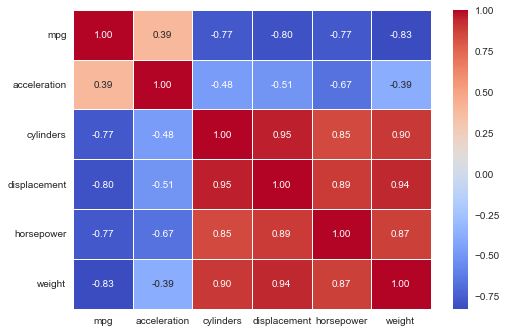

In [9]:
sns.heatmap(s_X_train.corr(), annot=True, cmap='coolwarm', fmt='0.2f', linewidth=0.5)
plt.show()

#### Compute and display VIF (drop `acceleration` as it has no strong correlation to `mpg`)

In [10]:
feature_df = s_X_train.drop(['acceleration', 'mpg'], axis=1)
vif_df = pd.DataFrame()
vif_df['feature_name'] = feature_df.columns
vif_df['vif_value'] = [variance_inflation_factor(feature_df.values, i) for i in range(len(feature_df.columns))]
vif_df

,feature_name,vif_value
0,cylinders,10.559632
1,displacement,19.482143
2,horsepower,5.149159
3,weight,8.928292


#### Drop `displacement` as it has a high VIF

In [11]:
feature_df = feature_df.drop('displacement', axis=1)
vif_df = pd.DataFrame()
vif_df['feature_name'] = feature_df.columns
vif_df['vif_value'] = [variance_inflation_factor(feature_df.values, i) for i in range(len(feature_df.columns))]
vif_df

,feature_name,vif_value
0,cylinders,5.694548
1,horsepower,4.550720
2,weight,6.710584


#### Adjust the training and test datasets

In [12]:
X_train_f = X_train.drop(['mpg', 'acceleration', 'displacement'], axis=1)
X_test_f = X_test.drop(['mpg', 'acceleration', 'displacement'], axis=1)

#### Initialize and fit the Linear Regression model

In [13]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train_f, y_train)

LinearRegression()

#### Predict outcomes using the test data

In [14]:
y_predict = model.predict(X_test_f)

#### Display RMSE value

In [15]:
np.sqrt(mean_squared_error(y_test, y_predict))

3.8107197595405595

#### Display R-Squared value

In [16]:
r2_score(y_test, y_predict)

0.7311218030071677

#### Initialize a 3rd degree Polynomial features

In [17]:
transformer = PolynomialFeatures(degree=3, include_bias=True)
s_X_train_f = s_X_train[['cylinders', 'horsepower', 'weight']]
s_X_test_f = s_X_test[['cylinders', 'horsepower', 'weight']]
X_p_train_f = transformer.fit_transform(s_X_train_f)
X_p_test_f = transformer.fit_transform(s_X_test_f)
X_p_train_f.shape

(293, 20)

#### Initialize and fit the Polynomial Regression model

In [18]:
p3_model = LinearRegression()
p3_model.fit(X_p_train_f, y_train)

LinearRegression()

#### Predict outcomes using the test data

In [19]:
y_predict = p3_model.predict(X_p_test_f)

#### Display R-Squared value

In [20]:
r2_score(y_test, y_predict)

0.5786089868597359

#### Convenience method to return a dictionary of values

In [21]:
def to_dict(al, sr, r2):
    dc = {'alpha': al}
    for i in range(len(sr)):
        k = "w%02d" % i
        if abs(sr[i]) == 0.00:
            dc[k] = 0.0
        else:
            dc[k] = sr[i]
    dc['R2'] = r2
    return dc

#### LASSO Regression

In [22]:
rows = []
for val in [0.01, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0]:
    lasso = Lasso(alpha=val)
    lasso.fit(X_p_train_f, y_train)
    y_predict = lasso.predict(X_p_test_f)
    rows.append(to_dict(val, lasso.coef_, r2_score(y_test, y_predict)))
lasso_df = pd.DataFrame.from_dict(rows)
with pd.option_context('display.float_format', '{:0.3f}'.format):
    display(lasso_df)

,alpha,w00,w01,w02,w03,w04,w05,w06,w07,w08,...,w11,w12,w13,w14,w15,w16,w17,w18,w19,R2
0,0.010,0.000,-2.795,0.000,-4.986,-0.739,0.000,0.057,3.591,-0.650,...,-2.213,1.714,-1.913,0.000,0.000,0.090,0.000,0.354,-0.155,0.732
1,0.500,0.000,-0.269,-1.309,-4.092,0.000,0.000,0.000,0.839,0.611,...,-0.570,0.000,-0.423,0.000,0.000,0.000,0.000,0.000,0.000,0.755
2,1.000,0.000,-0.248,-0.363,-4.410,0.000,0.000,0.000,0.000,0.000,...,-0.431,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.714
3,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,-0.183,0.000,0.000,-0.839,0.427
4,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,-0.234,0.000,0.000,-0.220,0.197
5,20.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000
6,50.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000
7,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000


#### Ridge Regression

In [23]:
rows = []
for val in [0.01, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0]:
    ridge = Ridge(alpha=val)
    ridge.fit(X_p_train_f, y_train)
    y_predict = ridge.predict(X_p_test_f)
    rows.append(to_dict(val, ridge.coef_, r2_score(y_test, y_predict)))
ridge_df = pd.DataFrame.from_dict(rows)
with pd.option_context('display.float_format', '{:0.3f}'.format):
    display(ridge_df)

,alpha,w00,w01,w02,w03,w04,w05,w06,w07,w08,...,w11,w12,w13,w14,w15,w16,w17,w18,w19,R2
0,0.010,0.000,-2.719,-0.090,-5.129,-1.671,0.819,1.345,4.828,-3.729,...,-2.068,4.792,-1.978,-1.690,-2.605,0.738,-2.783,5.118,-0.982,0.585
1,0.500,0.000,-2.799,-0.182,-4.890,-1.378,0.607,1.034,4.140,-2.318,...,-2.150,2.741,-2.162,-0.461,-1.031,0.503,-1.459,2.727,-0.684,0.696
2,1.000,0.000,-2.755,-0.354,-4.693,-1.191,0.578,0.820,3.715,-1.613,...,-2.096,2.094,-2.088,-0.266,-0.518,0.410,-0.984,1.926,-0.570,0.720
3,5.000,0.000,-2.269,-1.075,-3.739,-0.547,0.706,0.318,2.468,0.064,...,-1.795,0.947,-1.599,-0.319,0.074,0.256,-0.277,0.710,-0.333,0.745
4,10.000,0.000,-1.922,-1.300,-3.116,-0.253,0.781,0.254,2.027,0.524,...,-1.626,0.540,-1.357,-0.409,0.043,0.204,-0.138,0.446,-0.256,0.748
5,20.000,0.000,-1.575,-1.351,-2.458,-0.025,0.801,0.286,1.692,0.786,...,-1.431,0.178,-1.126,-0.471,-0.073,0.148,-0.060,0.256,-0.210,0.747
6,50.000,0.000,-1.201,-1.185,-1.709,0.113,0.729,0.379,1.334,0.913,...,-1.134,-0.176,-0.838,-0.477,-0.232,0.081,-0.036,0.064,-0.213,0.744
7,100.000,0.000,-0.995,-0.976,-1.295,0.117,0.624,0.419,1.084,0.892,...,-0.912,-0.333,-0.647,-0.437,-0.309,0.048,-0.052,-0.040,-0.246,0.740


#### Elastic Net Regression

In [25]:
rows = []
for val in [0.01, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0]:
    elastic = ElasticNet(alpha=val, tol=0.01)
    elastic.fit(X_p_train_f, y_train)
    y_predict = elastic.predict(X_p_test_f)
    rows.append(to_dict(val, elastic.coef_, r2_score(y_test, y_predict)))
elastic_df = pd.DataFrame.from_dict(rows)
with pd.option_context('display.float_format', '{:0.3f}'.format):
    display(elastic_df)

,alpha,w00,w01,w02,w03,w04,w05,w06,w07,w08,...,w11,w12,w13,w14,w15,w16,w17,w18,w19,R2
0,0.010,0.000,-2.652,-0.480,-4.536,-0.758,0.316,0.234,3.181,-0.512,...,-1.951,1.405,-1.974,0.000,0.000,0.190,-0.079,0.497,-0.241,0.739
1,0.500,0.000,-1.127,-0.917,-1.511,0.000,0.242,0.032,1.066,0.910,...,-0.782,-0.213,-0.624,-0.346,-0.231,0.000,0.000,0.000,-0.297,0.743
2,1.000,0.000,-0.854,-0.669,-1.122,0.000,0.003,0.000,0.629,0.675,...,-0.541,-0.230,-0.390,-0.273,-0.305,0.000,0.000,-0.008,-0.358,0.717
3,5.000,0.000,-0.124,0.000,-0.180,0.000,0.000,0.000,0.000,0.000,...,-0.252,-0.225,-0.149,-0.100,-0.231,-0.020,-0.033,-0.116,-0.386,0.512
4,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.056,-0.069,-0.067,-0.022,-0.134,-0.143,-0.077,-0.119,-0.324,0.367
5,20.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,-0.180,-0.022,0.000,-0.107,0.142
6,50.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000
7,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000
